In [38]:
import random
import re
import time
from bs4 import BeautifulSoup
import urllib3
import urllib
from lxml import etree
import json
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.common.keys import Keys
import pandas as pd
import sys
import pickle
requests.packages.urllib3.disable_warnings()

In [2]:
def get_website(url):
    proxy_support = urllib3.PoolManager()
    headers = ["Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.1 Safari/537.36", 
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2226.0 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 6.4; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2225.0 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2225.0 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2224.3 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.93 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.124 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36", 
    "Mozilla/5.0 (X11; OpenBSD i386) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36", 
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1944.0 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.3319.102 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.2309.372 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.2117.157 Safari/537.36", 
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36",
    "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1866.237 Safari/537.36", 
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.137 Safari/4E423F", 
    "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.116 Safari/537.36 Mozilla/5.0 (iPad; U; CPU OS 3_2 like Mac OS X; en-us) AppleWebKit/531.21.10 (KHTML, like Gecko) Version/4.0.4 Mobile/7B334b Safari/531.21.10",
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/33.0.1750.517 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1667.0 Safari/537.36", 
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1664.3 Safari/537.36", 
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1664.3 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/31.0.1650.16 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/31.0.1623.0 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/30.0.1599.17 Safari/537.36",
    "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.62 Safari/537.36", 
    "Mozilla/5.0 (X11; CrOS i686 4319.74.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.57 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.2 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1468.0 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1467.0 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1464.0 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1500.55 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36", 
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36",
    "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.90 Safari/537.36", 
    "Mozilla/5.0 (X11; NetBSD) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.116 Safari/537.36", 
    "Mozilla/5.0 (X11; CrOS i686 3912.101.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.116 Safari/537.36", 
    "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.60 Safari/537.17", 
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_2) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1309.0 Safari/537.17", 
    "Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.15 (KHTML, like Gecko) Chrome/24.0.1295.0 Safari/537.15", 
    "Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.14 (KHTML, like Gecko) Chrome/24.0.1292.0 Safari/537.14"]
    random_header = random.choice(headers)
    headers = {"User-Agent":random_header}
    req = proxy_support.request(method='Get', url=url, headers=headers)
    if req.status != 200:
        print('错误连接代码：{}'.format(req.status))
        # ime.sleep(600)
        return None
        # return get_website(url)
    return req.data.decode('utf-8')

In [ ]:
url = 'https://www.lagou.com/wn/jobs?kd={0}&city={1}&pn=1'.format(urllib.parse.quote('数据分析'),urllib.parse.quote('广州'))
options = webdriver.ChromeOptions()
# options.add_argument("headless")
options.add_experimental_option("excludeSwitches", ['enable-automation','enable-logging'])
options.add_argument('-ignore-certificate-errors')
options.add_argument('-ignore -ssl-errors')
# options.add_argument("headless")
browser = webdriver.Chrome('../chromedriver.exe',options=options)
browser.maximize_window()

browser.get(url)
# page = browser.page_source
html = browser.find_element(By.ID, 'jobList')
html = html.get_attribute('innerHTML')
soup = BeautifulSoup(html, "html.parser")
lists_top = soup(class_ = re.compile('^item-top'))
lists_bottom = soup(class_ = re.compile('^item-bom'))
p = soup(class_ = re.compile('^p-top'))
classname = re.compile(r'class="(?P<name>.*?)"').search(str(p[0])).group('name')
mouse = browser.find_element(By.XPATH, '//*[@id="jobList"]/div[1]/div[1]/div[1]/div[1]/div[1]/a')
ActionChains(browser).move_to_element(mouse).perform()
f = soup(class_ = re.compile('^modal_title_wrap'))
# 获取页数
pages = len(soup(class_ = re.compile('^lg-pagination-item')))
# time.sleep(10)


<div class="job_detail__2F5cP job-cur-detail" style="top: 0px; right: 0px; visibility: visible;"><div class="modal_title_wrap__20Dfa"><div class="modal_title__3KO_X"><p class="modal_title_text__1gawS"><span>数据分析师</span><span class="modal_moeny__3A-bv">12k-18k</span></p><p class="modal_title_discription__1Hjik"><span class="modal_split__3v-9v">广州</span><span class="modal_split__3v-9v">3-5年</span><span class="modal_split__3v-9v">本科</span><span class="modal_split__3v-9v">全职</span></p></div><div class="star_btn__g1qgZ"><span class="job_pick__1zTnk">收藏</span></div><button class="lg-button lg-button-primary lg-button-large deliver_resume__1YJVF" style="padding: 11px 25px;" type="button"><span>投简历</span></button></div><div class="job_discription__1qxwN"><div class="job_title__rEk9y">职位描述</div><div class="job_info__rB-X6 job_desr_max__N_INq"><div>工作职责：
<br/>1、负责APP相关数据分析，包括数据平台建设、人群画像和数据标签完善、日常数据分析和专题分析；
<br/>2、验证产品上线数据及策略效果，评估策略可行性，通过数据寻找优化空间，挖掘增长点；
<br/>3、定期对行业、自身产品及竞品等数据分析和评估，提出产品优化建议和运营建议。
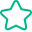

In [60]:
lists_item = soup(class_ = re.compile('^item__'))
# mouse1 = browser.find_element(By.CLASS_NAME, classname)
mouse1 = browser.find_element(By.XPATH, '//*[@id="jobList"]/div[1]/div[1]/div[1]/div[1]/div[1]/a')
ActionChains(browser).move_to_element(mouse1).perform()
h = browser.find_element(By.ID, 'jobList')
h = h.get_attribute('innerHTML')
s = BeautifulSoup(h, "html.parser")
f = s(class_ = re.compile('^job_detail'))
f[0]

In [73]:
f[0](class_ = re.compile('^modal_title_text'))[0].select('span')

[<span>数据分析师</span>, <span class="modal_moeny__3A-bv">12k-18k</span>]

In [72]:
f[0](class_ = re.compile('^modal_title_discription'))[0].select('span')

[<span class="modal_split__3v-9v">广州</span>,
 <span class="modal_split__3v-9v">3-5年</span>,
 <span class="modal_split__3v-9v">本科</span>,
 <span class="modal_split__3v-9v">全职</span>]

In [80]:
f[0](class_ = re.compile('^job_discription'))[0](class_ = re.compile('^job_info'))

[<div class="job_info__rB-X6 job_desr_max__N_INq"><div>工作职责：
 <br/>1、负责APP相关数据分析，包括数据平台建设、人群画像和数据标签完善、日常数据分析和专题分析；
 <br/>2、验证产品上线数据及策略效果，评估策略可行性，通过数据寻找优化空间，挖掘增长点；
 <br/>3、定期对行业、自身产品及竞品等数据分析和评估，提出产品优化建议和运营建议。
 <br/>
 <br/>任职要求：
 <br/>1、本科及以上学历，数学、统计等相关专业优先,三年以上互联网数据分析、商业分析经验；
 <br/>2、扎实的数理统计理论基础，有推荐系统、人群分类、用户标签，用户增长等项目经验优先，有直播社交行业数据分析经验者优先；
 <br/>3、能熟练使用EXCEL进行数据处理，熟练掌握SQL，有spark/presto/hive使用经验者优先考虑；
 <br/>4、自我驱动力强，追求卓越，工作细致、具备较强的学习能力及业务理解能力。 </div></div>,
 <div class="job_info__rB-X6">广州-海珠区-映客</div>]

In [87]:
lists_top[0]

<div class="item-top__1Z3Zo"><div class="position__21iOS"><div class="p-top__1F7CL"><a>数据分析师[新港]</a><span>19:09发布</span></div><div class="p-bom__JlNur"><span class="money__3Lkgq">12k-18k</span>经验3-5年 / 本科</div></div><div class="company__2EsC8"><div class="company-name__2-SjF"><a>北京蜜莱坞网络科技有限公司</a></div><div class="industry__1HBkr">MCN｜直播平台 / 上市公司 / 500-2000人</div></div><div class="com-logo__1QOwC"><img alt="北京蜜莱坞网络科技有限公司" src="https://www.lgstatic.com/thumbnail_120x120/i/image/M00/08/49/Cgp3O1bPycGAMj0hAAAgshBCvv4840.jpg"/></div></div>

In [115]:
p = re.compile(r'\[(?P<area>.*?)\]')
p.search(str(lists_top[0].select('a')[0])).group('area')

'新港'

In [95]:
lists_top[0](class_ = re.compile('^company-name'))[0]

<div class="company-name__2-SjF"><a>北京蜜莱坞网络科技有限公司</a></div>

In [94]:
lists_top[0](class_ = re.compile('^industry'))[0]

<div class="industry__1HBkr">MCN｜直播平台 / 上市公司 / 500-2000人</div>

In [102]:
lists_bottom[0].select('div')[0].select('span')

[<span>社交平台</span>,
 <span>MCN｜直播平台</span>,
 <span>SQL</span>,
 <span>Spark</span>]

In [118]:
lists_bottom[0].select('div')[1]

<div class="il__3lk85">“团队实力强，发展前景好”</div>

In [3]:
job,city = '数据分析','广州'

In [53]:
# 获取页数
url = 'https://www.lagou.com/wn/jobs?kd={0}&city={1}&pn=1'.format(urllib.parse.quote(job),urllib.parse.quote(city))

options = webdriver.ChromeOptions()
# options.add_argument("headless")
options.add_experimental_option("excludeSwitches", ['enable-automation','enable-logging'])
options.add_argument('-ignore-certificate-errors')
options.add_argument('-ignore -ssl-errors')
browser = webdriver.Chrome('../chromedriver.exe',options=options)
# browser.maximize_window()
cookies = pickle.load(open("cookies.pkl", "rb"))
browser.get(url)
for cookie in cookies:
    browser.add_cookie(cookie)
html = browser.find_element(By.ID, 'jobList')
html = html.get_attribute('innerHTML')
soup = BeautifulSoup(html, "html.parser")
pages = len(soup(class_ = re.compile('^lg-pagination-item')))
browser.quit()
pages

12

In [68]:
jobs = {}

In [ ]:
page = 1
for i in range(pages):
    num = len(jobs)
    a = 1
    p = re.compile(r'\[(?P<area>.*?)\]')
    url = 'https://www.lagou.com/wn/jobs?kd={0}&city={1}&pn={2}'.format(urllib.parse.quote(job),urllib.parse.quote(city),i+1)

    options = webdriver.ChromeOptions()
    options.add_experimental_option("excludeSwitches", ['enable-automation','enable-logging'])
    options.add_argument('-ignore-certificate-errors')
    options.add_argument('-ignore -ssl-errors')
    browser = webdriver.Chrome('../chromedriver.exe',options=options)
    browser.maximize_window()
    cookies = pickle.load(open("cookies.pkl", "rb"))
    browser.get(url)
    for cookie in cookies:
        browser.add_cookie(cookie)
    html = browser.find_element(By.ID, 'jobList')
    html = html.get_attribute('innerHTML')
    soup = BeautifulSoup(html, "html.parser")
    soup = BeautifulSoup(html, "html.parser")
    lists_top = soup(class_ = re.compile('^item-top'))
    lists_bottom = soup(class_ = re.compile('^item-bom'))
    time.sleep(2)
    browser.execute_script("window.scrollTo(0,0)")
    for i,j in zip(lists_top,lists_bottom):
        jobs[num] = {}
        # jobs[num]['工作标题'] = i(re.compile('^p-top'))[0].select('a')[0].text
        mouse1 = browser.find_element(By.XPATH, '//*[@id="jobList"]/div[1]/div[{0}]/div[1]/div[1]/div[1]/a'.format(a))
        ActionChains(browser).move_to_element(mouse1).perform()
        time.sleep(0.5)
        h = browser.find_element(By.ID, 'jobList')
        h = h.get_attribute('innerHTML')
        s = BeautifulSoup(h, "html.parser")
        f = s(class_ = re.compile('^job_detail'))
        if len(f) == 0:
            continue
        jobs[num]['工作标题'] = f[0](class_ = re.compile('^modal_title_text'))[0].select('span')[0].text
        jobs[num]['薪资'] = f[0](class_ = re.compile('^modal_title_text'))[0].select('span')[1].text
        jobs[num]['地区'] = f[0](class_ = re.compile('^modal_title_discription'))[0].select('span')[0].text
        jobs[num]['年限'] = f[0](class_ = re.compile('^modal_title_discription'))[0].select('span')[1].text
        jobs[num]['学历'] = f[0](class_ = re.compile('^modal_title_discription'))[0].select('span')[2].text
        jobs[num]['职限'] = f[0](class_ = re.compile('^modal_title_discription'))[0].select('span')[3].text
        jobs[num]['职位详情'] = f[0](class_ = re.compile('^job_discription'))[0](class_ = re.compile('^job_info'))[0].text
        jobs[num]['具体地点'] = f[0](class_ = re.compile('^job_discription'))[0](class_ = re.compile('^job_info'))[1].text
        jobs[num]['公司名字'] = i(class_ = re.compile('^company-name'))[0].text
        if len(i(class_ = re.compile('^industry'))) == 0:
            jobs[num]['公司情况'] = None
        else:
            jobs[num]['公司情况'] = i(class_ = re.compile('^industry'))[0].text
        jobs[num]['职位标签'] = []
        for k in j.select('div')[0].select('span'):
            jobs[num]['职位标签'].append(k.text)
        jobs[num]['公司标签'] = j.select('div')[1].text
        jobs[num]['地区'] = p.search(str(lists_top[0].select('a')[0])).group('area')
        browser.execute_script("window.scrollTo(0,{})".format(a*80))
        a += 1
        num += 1
    browser.quit()

In [24]:
data = pd.DataFrame(jobs).T
data.to_csv('data_{0}_{1}_{2}.csv'.format(city, job, page))

In [25]:
browser.quit()

In [74]:
'''
可运行主要的代码，先运行此代码块初始化浏览器，然后运行下一个代码块获取页面信息，通过点击下一页获取下一页的信息
'''
url = 'https://www.lagou.com/wn/jobs?kd={0}&city={1}&pn=1'.format(urllib.parse.quote(job),urllib.parse.quote(city))

options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ['enable-automation','enable-logging'])
options.add_argument('-ignore-certificate-errors')
options.add_argument('-ignore -ssl-errors')
browser = webdriver.Chrome('../chromedriver.exe',options=options)
browser.maximize_window()
cookies = pickle.load(open("cookies.pkl", "rb"))
browser.get(url)
for cookie in cookies:
    browser.add_cookie(cookie)
html = browser.find_element(By.ID, 'jobList')
html = html.get_attribute('innerHTML')
soup = BeautifulSoup(html, "html.parser")
pages = len(soup(class_ = re.compile('^lg-pagination-item')))

In [ ]:
jobs = {}
b = 1
p = re.compile(r'\[(?P<area>.*?)\]')
while(b <= pages):
    num = len(jobs)
    a = 1
    html = browser.find_element(By.ID, 'jobList')
    html = html.get_attribute('innerHTML')
    soup = BeautifulSoup(html, "html.parser")
    lists_top = soup(class_ = re.compile('^item-top'))
    lists_bottom = soup(class_ = re.compile('^item-bom'))
    time.sleep(2)
    browser.execute_script("window.scrollTo(0,0)")
    for i,j in zip(lists_top,lists_bottom):
        jobs[num] = {}
        # jobs[num]['工作标题'] = i(re.compile('^p-top'))[0].select('a')[0].text
        try:
            mouse1 = browser.find_element(By.XPATH, '//*[@id="jobList"]/div[1]/div[{0}]/div[1]/div[1]/div[1]/a'.format(a))
        except:
            continue
        ActionChains(browser).move_to_element(mouse1).perform()
        time.sleep(0.5)
        h = browser.find_element(By.ID, 'jobList')
        h = h.get_attribute('innerHTML')
        s = BeautifulSoup(h, "html.parser")
        f = s(class_ = re.compile('^job_detail'))
        if len(f) == 0:
            continue
        jobs[num]['工作标题'] = f[0](class_ = re.compile('^modal_title_text'))[0].select('span')[0].text
        jobs[num]['薪资'] = f[0](class_ = re.compile('^modal_title_text'))[0].select('span')[1].text
        jobs[num]['城市'] = f[0](class_ = re.compile('^modal_title_discription'))[0].select('span')[0].text
        jobs[num]['地区'] = p.search(str(i.select('a')[0])).group('area')
        jobs[num]['年限'] = f[0](class_ = re.compile('^modal_title_discription'))[0].select('span')[1].text
        jobs[num]['学历'] = f[0](class_ = re.compile('^modal_title_discription'))[0].select('span')[2].text
        jobs[num]['职限'] = f[0](class_ = re.compile('^modal_title_discription'))[0].select('span')[3].text
        jobs[num]['职位详情'] = f[0](class_ = re.compile('^job_discription'))[0](class_ = re.compile('^job_info'))[0].text
        jobs[num]['具体地点'] = f[0](class_ = re.compile('^job_discription'))[0](class_ = re.compile('^job_info'))[1].text
        jobs[num]['公司名字'] = i(class_ = re.compile('^company-name'))[0].text
        if len(i(class_ = re.compile('^industry'))) == 0:
            jobs[num]['公司情况'] = None
        else:
            jobs[num]['公司情况'] = i(class_ = re.compile('^industry'))[0].text
        jobs[num]['职位标签'] = []
        for k in j.select('div')[0].select('span'):
            jobs[num]['职位标签'].append(k.text)
        jobs[num]['公司标签'] = j.select('div')[1].text
        browser.execute_script("window.scrollTo(0,{})".format(a*80))
        a += 1
        num += 1
    # 点击下一页
    try:
        browser.find_element(By.CLASS_NAME, 'lg-pagination-next').click()
    except:
        continue
    b+=1

In [73]:
data = pd.DataFrame(jobs).T
data.to_csv('data_{0}_{1}.csv'.format(city, job))
browser.quit()